In [37]:
import xarray as xr
import numpy as np
import rioxarray
import geopandas as gpd
import os
from glob import glob

def regrid(filepath):
    
    da = xr.open_dataset(filepath)
    
    x = np.arange(da.x_range[0],da.x_range[1],da.spacing[0].values)
    y = np.arange(da.y_range[0],da.y_range[1],da.spacing[1].values)
    z = np.reshape(da.z.values,(da.dimension[1].values,da.dimension[0].values))
    
    da = xr.DataArray(
        data=z,
        dims=["y", "x"],
        coords=dict(
            y=("y", y),
            x=("x", x),
        ),
    )
    
    return da

size = 300

pathIn = f"~/data/polar/source/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathIn = os.path.expanduser(pathIn)

pathOut = f"~/data/polar/cubes/geothermal_heat_flow_uncertainty_{size}x{size}km_xyz_data"
pathOut = os.path.expanduser(pathOut)

if not os.path.exists(pathOut):
    os.makedirs(pathOut)
    
filepath = os.path.join(pathIn,f'{size}km_GHF_uncertainty.nc')

da = regrid(filepath)

da.name = f"geothermal_heat_flow_uncertainty_{size}km"

da = da.to_dataset()
da = da.chunk(dict(x=2048,y=2048))

da = da.where(lambda x: x>=0,other=np.nan)

# da.to_zarr(f"{pathOut}/curie_depth_{size}km.zarr")

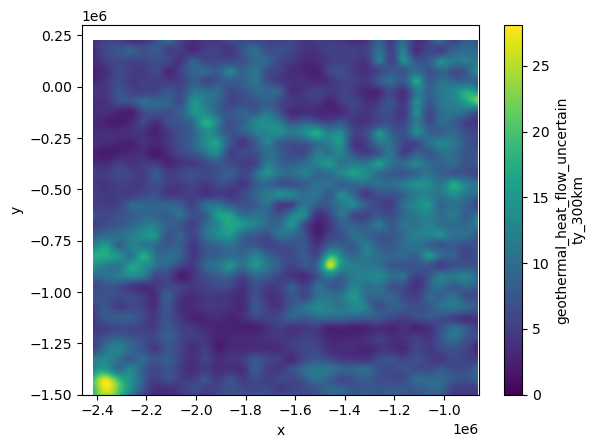

In [38]:
da.geothermal_heat_flow_uncertainty_300km.plot()

In [21]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 3601, x: 3201)
Coordinates:
  * y                           (y) float64 -1.5e+06 -1.5e+06 ... 2.998e+05
  * x                           (x) float64 -2.46e+06 -2.46e+06 ... -8.602e+05
Data variables:
    geothermal_heat_flow_300km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [17]:
da.chunk(dict(x=2048,y=2048))

<xarray.Dataset>
Dimensions:                     (y: 18700, x: 16700)
Coordinates:
  * y                           (y) float64 -1.485e+06 -1.485e+06 ... 3.849e+05
  * x                           (x) float64 -2.475e+06 -2.475e+06 ... -8.051e+05
Data variables:
    geothermal_heat_flow_200km  (y, x) float32 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [9]:
da.geothermal_heat_flow_300km.min()

<xarray.DataArray 'geothermal_heat_flow_300km' ()>
array(-3.40282347e+38)